## The sign-language-digits dataset is taken from the following link:
## https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset

In [194]:
import tensorflow
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
import numpy as np

In [3]:
? np.load

In [17]:
X = np.load('E:\Datasets\X.npy')

In [18]:
X

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [19]:
Y = np.load('E:\Datasets\Y.npy')

In [20]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
X.shape      # A stack of 2062 images each of size 64-by-64 - expressed as a 3 dimensional tensor.

(2062, 64, 64)

In [22]:
Y.shape

(2062, 10)

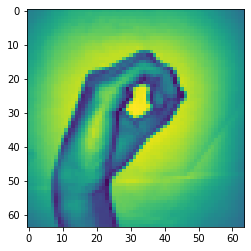

In [12]:
plt.imshow(X[260])

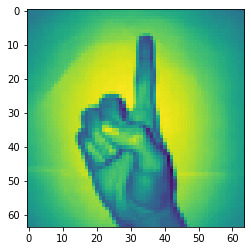

In [13]:
plt.imshow(X[900])

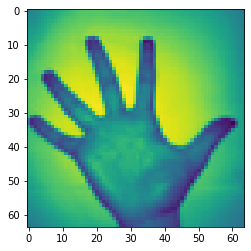

In [14]:
plt.imshow(X[2000])

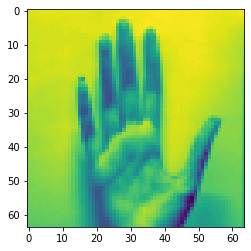

In [16]:
plt.imshow(X[2061])

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

In [36]:
? train_test_split

In [26]:
X[0]    # a 64-by-64 pixel grid

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

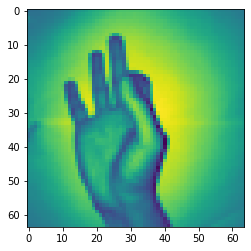

In [28]:
plt.imshow(X[0])

In [29]:
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
? plt.imshow    # in Grayscale

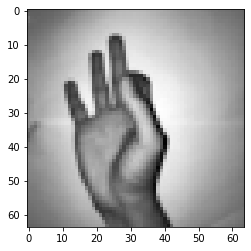

In [34]:
plt.imshow(X[0], 'gray')

In [35]:
# I am using one-fifth of the dataset for validation i.e 2062/5=413 for testing the trained neural network

412.4

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [85]:
X_train

array([[[0.56078434, 0.5647059 , 0.5647059 , ..., 0.5411765 ,
         0.54901963, 0.54509807],
        [0.56078434, 0.57254905, 0.5764706 , ..., 0.56078434,
         0.56078434, 0.5529412 ],
        [0.5647059 , 0.5764706 , 0.5803922 , ..., 0.57254905,
         0.5686275 , 0.5568628 ],
        ...,
        [0.5137255 , 0.5176471 , 0.5176471 , ..., 0.49411765,
         0.49411765, 0.4862745 ],
        [0.50980395, 0.50980395, 0.50980395, ..., 0.49411765,
         0.49019608, 0.47843137],
        [0.5019608 , 0.5019608 , 0.5058824 , ..., 0.4862745 ,
         0.48235294, 0.47058824]],

       [[0.49411765, 0.5058824 , 0.52156866, ..., 0.46666667,
         0.4509804 , 0.4392157 ],
        [0.50980395, 0.5176471 , 0.5372549 , ..., 0.47843137,
         0.45882353, 0.44705883],
        [0.52156866, 0.5411765 , 0.56078434, ..., 0.48235294,
         0.46666667, 0.4509804 ],
        ...,
        [0.4862745 , 0.5019608 , 0.5058824 , ..., 0.46666667,
         0.4509804 , 0.4392157 ],
        [0.4

In [86]:
X_train.shape

(1649, 64, 64)

In [87]:
X_train[0]

array([[0.56078434, 0.5647059 , 0.5647059 , ..., 0.5411765 , 0.54901963,
        0.54509807],
       [0.56078434, 0.57254905, 0.5764706 , ..., 0.56078434, 0.56078434,
        0.5529412 ],
       [0.5647059 , 0.5764706 , 0.5803922 , ..., 0.57254905, 0.5686275 ,
        0.5568628 ],
       ...,
       [0.5137255 , 0.5176471 , 0.5176471 , ..., 0.49411765, 0.49411765,
        0.4862745 ],
       [0.50980395, 0.50980395, 0.50980395, ..., 0.49411765, 0.49019608,
        0.47843137],
       [0.5019608 , 0.5019608 , 0.5058824 , ..., 0.4862745 , 0.48235294,
        0.47058824]], dtype=float32)

In [88]:
X_test.shape

(413, 64, 64)

In [89]:
X_test

array([[[0.78039217, 0.7921569 , 0.80784315, ..., 0.8509804 ,
         0.84313726, 0.83137256],
        [0.78431374, 0.80784315, 0.8156863 , ..., 0.85490197,
         0.84705883, 0.8392157 ],
        [0.79607844, 0.8117647 , 0.8156863 , ..., 0.85490197,
         0.84705883, 0.8392157 ],
        ...,
        [0.6431373 , 0.64705884, 0.654902  , ..., 0.69411767,
         0.6901961 , 0.68235296],
        [0.63529414, 0.6392157 , 0.64705884, ..., 0.6862745 ,
         0.68235296, 0.6745098 ],
        [0.62352943, 0.627451  , 0.63529414, ..., 0.6745098 ,
         0.67058825, 0.6627451 ]],

       [[0.5529412 , 0.5647059 , 0.57254905, ..., 0.49411765,
         0.47843137, 0.46666667],
        [0.5647059 , 0.5764706 , 0.58431375, ..., 0.5137255 ,
         0.49803922, 0.4862745 ],
        [0.5764706 , 0.5882353 , 0.6       , ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        ...,
        [0.52156866, 0.52156866, 0.52156866, ..., 0.48235294,
         0.4745098 , 0.46666667],
        [0.5

In [90]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
y_train.shape

(1649, 10)

In [92]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [93]:
y_test.shape

(413, 10)

In [94]:
X_train.max()

1.0

In [95]:
X_test.max()

1.0

In [96]:
X_train.min()

0.003921569

In [97]:
X_test.min()

0.02745098

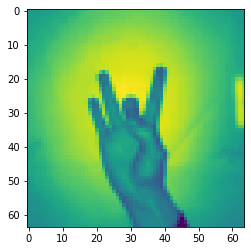

In [98]:
plt.imshow(X_train[0])

In [99]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

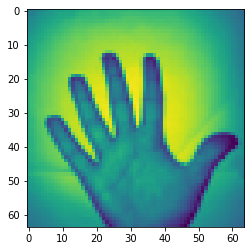

In [100]:
plt.imshow(X_train[1])

In [81]:
y_train[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

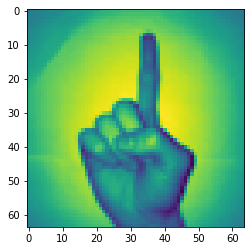

In [82]:
plt.imshow(X_train[100])

In [83]:
y_train[100]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [57]:
y_train.shape

(1649, 10)

In [58]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1649, 64, 64)
(1649, 10)
(413, 64, 64)
(413, 10)


In [59]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

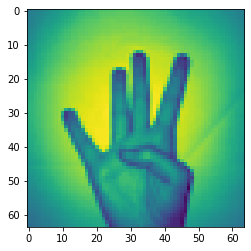

In [62]:
plt.imshow(X_train[2])

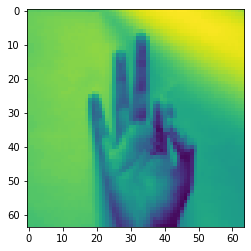

In [63]:
plt.imshow(X_train[3])

#### Splitting the Training and Test data

In [101]:
? train_test_split

In [107]:
X_train_reshaped = X_train.reshape(-1, 64, 64, 1)
X_test_reshaped = X_test.reshape(-1, 64, 64, 1)

In [109]:
X_test_reshaped.shape

(413, 64, 64, 1)

In [122]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.layers import BatchNormalization

#### Building the layers of the neural network...

In [123]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape = (64, 64, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.22))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

In [150]:
# model.compile(optimizer=SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss="categorical_crossentropy", metrics=['accuracy'])

In [118]:
? ImageDataGenerator

In [151]:
train_gen = ImageDataGenerator(featurewise_center = False,                      # set input mean to 0 over the dataset
        samplewise_center = False,                                              # set each sample mean to 0
        featurewise_std_normalization = False,                                  # divide inputs by std of the dataset
        samplewise_std_normalization = False,                                   # divide each input by its std
        zca_whitening = False,                                                  # reducing the dimensions
        rotation_range = 10,                                                    # randomly rotate images in the range 10 degrees
        zoom_range = 0.1,                                                       # Randomly zoom image 1%
        width_shift_range = 0.1,                                                # randomly shift images horizontally 1%
        height_shift_range = 0.1,                                               # randomly shift images vertically 1%
        horizontal_flip = True,                                                 # randomly flip images
        vertical_flip = True)                                                   # randomly flip images

In [152]:
train_gen.fit(X_train_reshaped)

In [153]:
History = model.fit_generator(train_gen.flow(X_train_reshaped, y_train, batch_size=32), 
                             epochs=20, validation_data=(X_test_reshaped, y_test))

Epoch 1/20


C:\Users\Sai Ganesh\AppData\Local\Temp\ipykernel_16952\1503049174.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(train_gen.flow(X_train_reshaped, y_train, batch_size=32),


52/52 [==============================] - 10s 168ms/step - loss: 0.2977 - accuracy: 0.8993 - val_loss: 0.0877 - val_accuracy: 0.9709
Epoch 2/20
52/52 [==============================] - 9s 170ms/step - loss: 0.3380 - accuracy: 0.8939 - val_loss: 0.1058 - val_accuracy: 0.9588
Epoch 3/20
52/52 [==============================] - 10s 186ms/step - loss: 0.2879 - accuracy: 0.9048 - val_loss: 0.1333 - val_accuracy: 0.9564
Epoch 4/20
52/52 [==============================] - 9s 176ms/step - loss: 0.3079 - accuracy: 0.9018 - val_loss: 0.2638 - val_accuracy: 0.9322
Epoch 5/20
52/52 [==============================] - 9s 169ms/step - loss: 0.2618 - accuracy: 0.9121 - val_loss: 0.0615 - val_accuracy: 0.9758
Epoch 6/20
52/52 [==============================] - 9s 169ms/step - loss: 0.3129 - accuracy: 0.8975 - val_loss: 0.1877 - val_accuracy: 0.9370
Epoch 7/20
52/52 [==============================] - 10s 185ms/step - loss: 0.2787 - accuracy: 0.9181 - val_loss: 0.0920 - val_accuracy: 0.9685
Epoch 8/20
52/

In [157]:
epochs = [i for i in  range(1, 21)]

In [158]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [133]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [136]:
training_accuracy = History.history['accuracy']
validation_accuracy = History.history['val_accuracy']

training_loss = History.history['loss']
validation_loss = History.history['val_loss']

In [159]:
score = model.evaluate(X_test_reshaped, y_test, verbose='auto')

13/13 [==============================] - 0s 32ms/step - loss: 0.0854 - accuracy: 0.9637


In [160]:
score

[0.08537979423999786, 0.9636803865432739]

In [161]:
print("The final accuracy is: ", score[1]*100)
print("The final loss is: ", score[0])

The final accuracy is:  96.36803865432739
The final loss is:  0.08537979423999786


### Analyzing the Model's Evaluated Performance

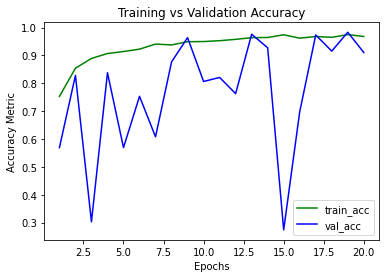

In [164]:
plt.plot(epochs, training_accuracy, 'g', label = 'train_acc')
plt.plot(epochs, validation_accuracy, 'b', label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Metric')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

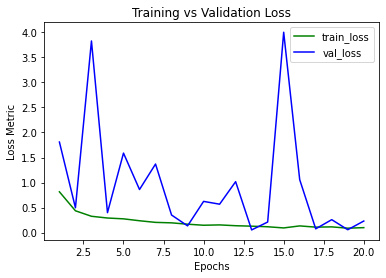

In [165]:
plt.plot(epochs, training_loss, 'g', label = 'train_loss')
plt.plot(epochs, validation_loss, 'b', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Metric')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [166]:
predictions = model.predict(X_test_reshaped)

13/13 [==============================] - 10s 36ms/step


In [167]:
predictions

array([[1.2740564e-02, 8.0347592e-05, 3.2773800e-04, ..., 6.0994469e-04,
        1.9817080e-06, 4.8995456e-03],
       [1.0723685e-08, 6.1754976e-18, 2.5933968e-15, ..., 3.8926029e-10,
        3.8547730e-22, 1.0000000e+00],
       [3.9930347e-07, 5.7989677e-08, 3.0542567e-04, ..., 8.0896752e-06,
        2.8174938e-04, 4.5509627e-10],
       ...,
       [3.2432212e-15, 1.0000000e+00, 1.3007486e-14, ..., 3.8910821e-17,
        4.3171660e-18, 4.7478093e-20],
       [9.1356860e-04, 1.2233512e-03, 2.5385753e-03, ..., 1.0494658e-03,
        1.3189601e-03, 3.3620174e-05],
       [8.4932136e-14, 1.0000000e+00, 3.1417220e-16, ..., 2.1421779e-20,
        1.0624998e-20, 7.4686364e-21]], dtype=float32)

In [168]:
predictions.shape

(413, 10)

#### Some Diagnostic Plots...

In [169]:
predictions[0]

array([1.2740564e-02, 8.0347592e-05, 3.2773800e-04, 4.0914990e-02,
       1.4785788e-07, 1.8065232e-04, 9.4024414e-01, 6.0994469e-04,
       1.9817080e-06, 4.8995456e-03], dtype=float32)

In [170]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [171]:
predictions[1]

array([1.07236851e-08, 6.17549760e-18, 2.59339677e-15, 3.71554228e-19,
       1.02850177e-22, 3.57575124e-12, 1.15002488e-08, 3.89260291e-10,
       3.85477298e-22, 1.00000000e+00], dtype=float32)

In [172]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

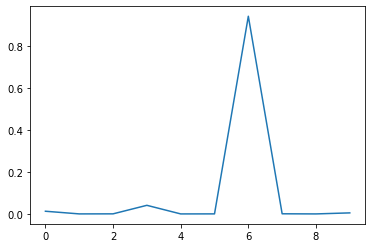

In [173]:
plt.plot(predictions[0])

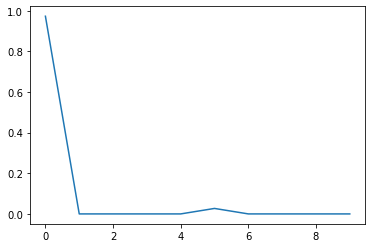

In [177]:
plt.plot(predictions[4])

In [178]:
predictions[4]

array([9.73002553e-01, 2.12124769e-06, 2.37244694e-06, 1.02953805e-07,
       2.30091203e-07, 2.69846953e-02, 6.53835968e-06, 1.25299562e-06,
       1.52522844e-07, 1.44777959e-08], dtype=float32)

In [179]:
y_test[4]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

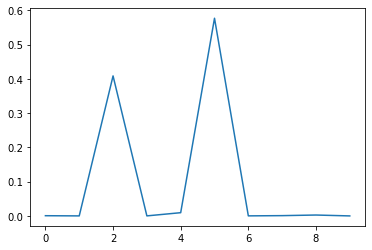

In [180]:
plt.plot(predictions[100])

In [181]:
predictions[100] # As can be seen, there's a significant flaw in the prediction here. It's supposed to be at index-2 but there is an even bigger spike at index-5

array([6.1060797e-04, 6.1783830e-05, 4.0888813e-01, 1.0609956e-04,
       9.4344718e-03, 5.7732773e-01, 1.5156460e-04, 8.2405307e-04,
       2.5934272e-03, 2.2306190e-06], dtype=float32)

In [182]:
y_test[100]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

### Confusion Matrix

In [189]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [192]:
y_test.shape

(413, 10)

In [190]:
y_True = np.argmax(y_test, axis=1)
y_True

array([6, 9, 3, 9, 0, 5, 8, 2, 5, 9, 4, 9, 7, 1, 3, 3, 0, 5, 0, 7, 0, 8,
       3, 6, 9, 2, 7, 3, 5, 9, 8, 5, 4, 6, 4, 6, 3, 1, 9, 2, 7, 7, 3, 1,
       1, 2, 0, 7, 8, 9, 1, 9, 6, 2, 1, 0, 6, 8, 2, 8, 8, 7, 2, 7, 5, 9,
       2, 3, 6, 4, 1, 1, 5, 7, 4, 9, 9, 4, 3, 8, 8, 9, 2, 0, 9, 0, 0, 4,
       1, 5, 5, 4, 7, 4, 7, 4, 2, 2, 8, 7, 2, 0, 9, 0, 2, 1, 7, 8, 8, 7,
       2, 8, 3, 3, 2, 2, 6, 1, 5, 5, 5, 0, 1, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 3, 8, 9, 2, 2, 2, 6, 2, 6, 6, 1, 6, 2, 5, 4, 9, 2, 1, 2,
       6, 2, 6, 6, 1, 1, 7, 5, 9, 8, 6, 2, 4, 7, 6, 9, 8, 7, 2, 9, 1, 6,
       7, 6, 0, 6, 1, 7, 4, 8, 4, 3, 2, 2, 4, 2, 8, 6, 8, 3, 2, 0, 8, 8,
       8, 5, 4, 7, 0, 8, 2, 4, 2, 5, 5, 8, 9, 0, 2, 8, 5, 3, 1, 3, 5, 0,
       6, 4, 6, 1, 7, 5, 4, 1, 9, 5, 8, 4, 7, 6, 3, 1, 5, 4, 6, 4, 9, 6,
       1, 0, 9, 0, 1, 2, 3, 9, 2, 4, 2, 0, 0, 8, 2, 5, 9, 2, 4, 7, 9, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 8, 9, 5, 7, 7, 3, 1, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 8, 3, 0, 7, 0, 8, 0, 6, 5, 2, 1, 0, 0,

In [191]:
y_True.shape

(413,)

In [188]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_true= y_True, y_pred= np.argmax(predictions, axis=1))

In [193]:
Confusion_Matrix

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1, 31,  0,  0,  1,  0,  2,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  1, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0, 38,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 46]], dtype=int64)

In [195]:
? sns.heatmap

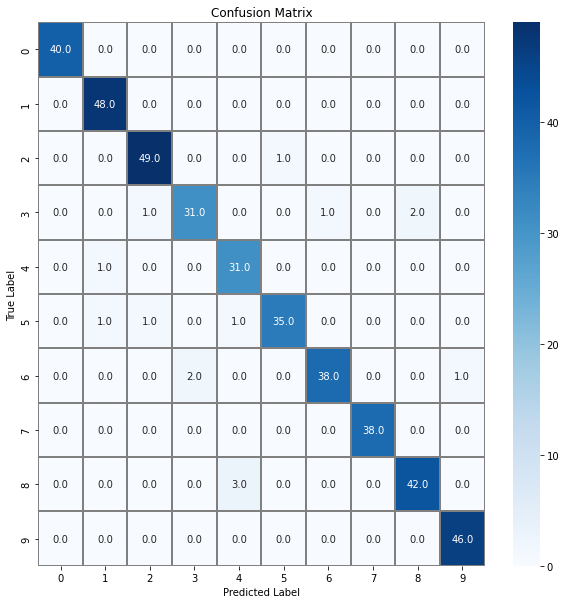

In [197]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Confusion_Matrix, annot=True, cmap='Blues', linecolor='gray', fmt='.1f', ax = ax, linewidths=0.01)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# plt.legend()
plt.show()

### Classification Report

In [198]:
from sklearn.metrics import classification_report

In [199]:
Classification_Report = classification_report(y_true= y_True, y_pred= np.argmax(y_test, axis=1))

In [200]:
Classification_Report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        40\n           1       1.00      1.00      1.00        48\n           2       1.00      1.00      1.00        50\n           3       1.00      1.00      1.00        35\n           4       1.00      1.00      1.00        32\n           5       1.00      1.00      1.00        38\n           6       1.00      1.00      1.00        41\n           7       1.00      1.00      1.00        38\n           8       1.00      1.00      1.00        45\n           9       1.00      1.00      1.00        46\n\n    accuracy                           1.00       413\n   macro avg       1.00      1.00      1.00       413\nweighted avg       1.00      1.00      1.00       413\n'